<a href="https://colab.research.google.com/github/SaashaJoshi/raman-spetroscopy-chemical-detection/blob/master/Savitzky_Golay_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal

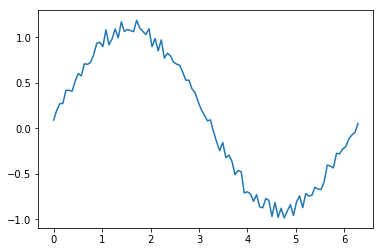

In [0]:
x=np.linspace(0, 2*np.pi, 100)
y=np.sin(x)+np.random.random(100)*0.2
plt.plot(x, y)
plt.show()

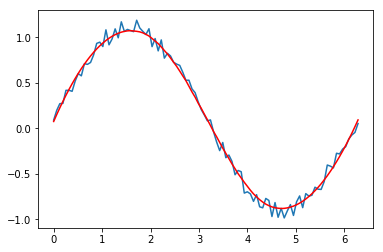

In [0]:
y_hat=scipy.signal.savgol_filter(y, 51, 3)

plt.plot(x, y)
plt.plot(x, y_hat, color='red')
plt.show()

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Actinolite.txt to Actinolite.txt


In [0]:
df=pd.read_csv('Actinolite.txt', header=None)
df.columns=['w', 'i']

In [0]:
w=df.iloc[:, :-1]    # Raman Shift
i=df.iloc[:, -1]     # Intensity

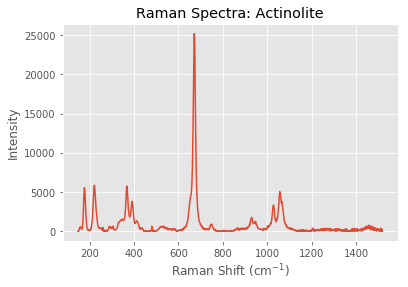

In [0]:
with plt.style.context(('ggplot')):
  plt.plot(w, i.T) #T: transpose 
  plt.xlabel('Raman Shift (cm$^{-1}$)')
  plt.ylabel('Intensity')
  plt.title('Raman Spectra: Actinolite')
  plt.show()

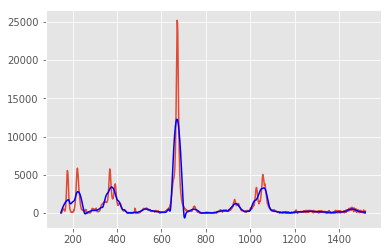

In [0]:
i_hat=scipy.signal.savgol_filter(i, 51, 2)

with plt.style.context(('ggplot')):
  plt.plot(w, i.T)
  plt.plot(w, i_hat.T, color='blue')
  plt.show()

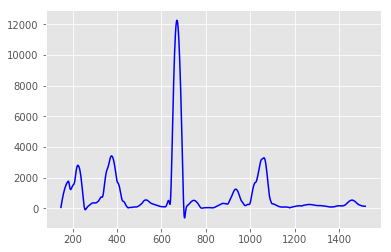

In [0]:
with plt.style.context(('ggplot')):
  plt.plot(w, i_hat.T, color='blue')
  plt.show()

Let's call the window length M, and N is the order of the polynomial. One important thing to realize is that you use a polynomial of order N to approximate M data points. This means that you use M points to compute N+1 polynomial coefficients (an Nth order polynomial has N+1 coefficients). So if N+1=M then you do not smooth at all but you just use the polynomial to interpolate the data points. In your example this is almost the case, i.e. there is hardly any smoothing. Generally, N is chosen considerably smaller than M to achieve some smoothing (and also for numerical stability). The smaller N compared to M, the more smoothing you will get. What remains is the choice of M, but as far as I know there are no general guidelines. In practical examples I've seen polynomial orders of 4 or 5 with much larger values for M. With all this in mind it remains to try several combinations of M and N and choose the one that fits best your application.
[Savitzky-Golay filter parameters](https://dsp.stackexchange.com/questions/15643/savitzky-golay-filter-parameters?newreg=79a387b49ce64d24a3cd95ac6c4e2520)
